# Preprocessing the Dataset

In [2]:
#Importing the libraries
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('breast cancer.csv')

## Observation and Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SubjectNo         243 non-null    int64  
 1   PatientID         243 non-null    object 
 2   Age               243 non-null    int64  
 3   Weight            243 non-null    float64
 4   Height            243 non-null    float64
 5   Parity            243 non-null    object 
 6   NoOfChildren      243 non-null    int64  
 7   MenopausalStatus  243 non-null    object 
 8   AgeAtMenarche     243 non-null    int64  
 9   AgeAtMenopause    129 non-null    float64
 10  UseOfHRT          243 non-null    object 
 11  FamilyHystory     243 non-null    object 
 12  Binary            243 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 24.8+ KB


In [4]:
# Count missing values in each column
missing_counts = df.isnull().sum()

# Print the missing value counts for each column
print("Missing Value Counts in Each Column:")
print(missing_counts)

Missing Value Counts in Each Column:
SubjectNo             0
PatientID             0
Age                   0
Weight                0
Height                0
Parity                0
NoOfChildren          0
MenopausalStatus      0
AgeAtMenarche         0
AgeAtMenopause      114
UseOfHRT              0
FamilyHystory         0
Binary                0
dtype: int64


##### Removing 'SubjectNo' & 'PatientID' columns from the dataset because they are not affectable to the model

In [5]:
# Drop 'SubjectNo' and 'PatientID' columns 
df = df.drop(['SubjectNo', 'PatientID'], axis=1)

In [6]:
# Renaming the Binary column as 'CancerPrediction'
df = df.rename(columns={'Binary': 'CancerPrediction'})

### Basic Statistics and Visualizations

              Age      Weight      Height  NoOfChildren  AgeAtMenarche  \
count  243.000000  243.000000  243.000000    243.000000     243.000000   
mean    51.584362   61.865144    1.541564      2.205761      13.456790   
std      8.928324   11.042376    0.082722      1.142189       1.502472   
min     35.000000   32.550000    1.220000      0.000000      10.000000   
25%     45.000000   53.875000    1.495000      2.000000      12.000000   
50%     51.000000   61.000000    1.530000      2.000000      13.000000   
75%     58.000000   69.035000    1.580000      3.000000      14.000000   
max     78.000000  106.000000    1.990000      6.000000      18.000000   

       AgeAtMenopause  CancerPrediction  
count      129.000000        243.000000  
mean        48.193798          0.185185  
std          4.491446          0.389249  
min         35.000000          0.000000  
25%         45.000000          0.000000  
50%         49.000000          0.000000  
75%         51.000000          0.000000

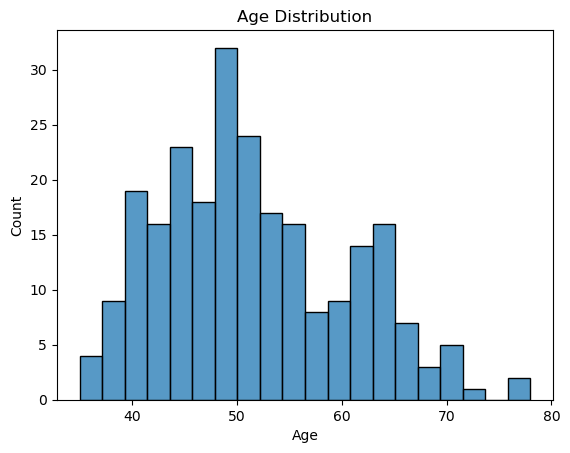

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())

sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

### There are many missing values in the AgeAtMenopause' column. It needs to replace the missing values with the median value of the column

In [8]:
median_age_at_menopause = df['AgeAtMenopause'].median()
df['AgeAtMenopause'].fillna(median_age_at_menopause, inplace=True)

In [9]:
print(df.head())

   Age  Weight  Height   Parity  NoOfChildren MenopausalStatus  AgeAtMenarche  \
0   40   50.00    1.65  Parouse             2    Premenopausal             13   
1   55   70.20    1.58  Parouse             3   Postmenopausal             14   
2   51   41.25    1.46  Parouse             2    Premenopausal             14   
3   45   70.50    1.64  Parouse             1    Premenopausal             14   
4   50   60.90    1.49  Parouse             3    Premenopausal             12   

   AgeAtMenopause UseOfHRT FamilyHystory  CancerPrediction  
0            49.0       No            No                 0  
1            42.0       No            No                 0  
2            49.0       No            No                 1  
3            49.0       No            No                 1  
4            49.0       No            No                 0  


#### 'Parity', 'MenopausalStatus', 'UseOfHRT', 'FamilyHystory'. These columns has categorical values, So they need to be encoded with  Binary encoding method. Binary encoding is a method of converting categorical variables into binary (0 or 1) columns.

In [10]:
df = pd.get_dummies(df, columns=['Parity', 'MenopausalStatus', 'UseOfHRT', 'FamilyHystory'], dtype=int)


#### "Age", "Weight", "Height" columns can be normalized by min-max normalization method.it will increase the performance with less computational power

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = df.copy()  # Create a copy of the original DataFrame

columns_to_normalize = ["Age", "Weight", "Height","AgeAtMenarche","AgeAtMenopause"]

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])





In [12]:
print(data.head())

        Age    Weight    Height  NoOfChildren  AgeAtMenarche  AgeAtMenopause  \
0  0.116279  0.237577  0.558442             2          0.375        0.636364   
1  0.465116  0.512594  0.467532             3          0.500        0.318182   
2  0.372093  0.118448  0.311688             2          0.500        0.636364   
3  0.232558  0.516678  0.545455             1          0.500        0.636364   
4  0.348837  0.385977  0.350649             3          0.250        0.636364   

   CancerPrediction  Parity_Nulliparouse  Parity_Parouse  \
0                 0                    0               1   
1                 0                    0               1   
2                 1                    0               1   
3                 1                    0               1   
4                 0                    0               1   

   MenopausalStatus_Postmenopausal  MenopausalStatus_Premenopausal  \
0                                0                               1   
1                 

In [13]:
# Checking the count of the instances for each class in the target variable.
class_counts = df['CancerPrediction'].value_counts()
print(class_counts)

CancerPrediction
0    198
1     45
Name: count, dtype: int64


### CancerPrediction column is the targeted column. But the dataset is not balanced. So it needs to be balanced for the best results. Here i applied Oversampling technique from SMOTE to increase number of the minority values as same as the majority value.



In [14]:
from imblearn.over_sampling import SMOTE

X = data.drop('CancerPrediction', axis=1)
y = data['CancerPrediction']

# Initialize SMOTE with 'minority' strategy
smote = SMOTE(sampling_strategy='auto', random_state=17)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())

CancerPrediction
0    198
1    198
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [17]:
import sklearn.metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test,y_pred))
    print('Recall:\n', metrics.recall_score(y_test, y_pred))

## Logistic Regression Classifier & It's ROC Curve

In [18]:
import sklearn.metrics as metrics

lr_classifier = LogisticRegression(max_iter=1000)
desc = lr_classifier.fit(X_train , y_train)
print(desc)

y_pred = lr_classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test , y_pred))

LogisticRegression(max_iter=1000)
[[33  8]
 [ 7 32]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.80      0.82      0.81        39

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



In [19]:
# Make probability predictions
y_pred_prob = lrc_grid.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., increase it for higher precision)
threshold = 0.6
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Evaluate the adjusted predictions
print_model_performance(lrc_grid, X_test, y_pred_adjusted)  # Define a print_model_performance function

NameError: name 'lrc_grid' is not defined

In [20]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Create a logistic regression classifier with class weights
lr_classifier = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

# Train and evaluate the model
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
print_model_performance(lr_classifier, X_test, y_test)  # Define a print_model_performance function explain this code

Accuracy score:
 0.8125
Confussion matrix:
 [[33  8]
 [ 7 32]]
Classification report:
               precision    recall  f1-score   support

           0     0.8250    0.8049    0.8148        41
           1     0.8000    0.8205    0.8101        39

    accuracy                         0.8125        80
   macro avg     0.8125    0.8127    0.8125        80
weighted avg     0.8128    0.8125    0.8125        80

Precision:
 0.8
Recall:
 0.8205128205128205


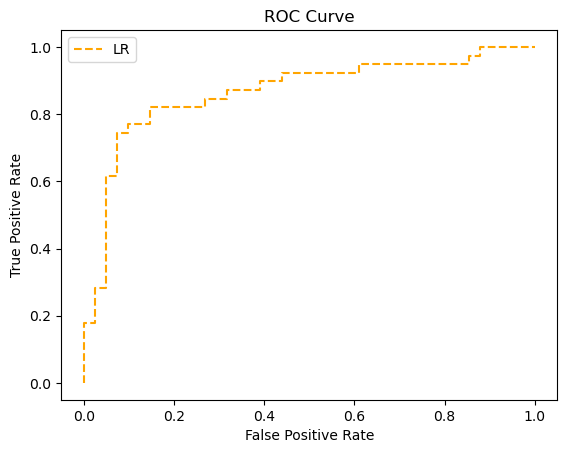

In [21]:
from sklearn.metrics import roc_curve

pred_prob = lr_classifier.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test, pred_prob[:,1],pos_label=1)

plt.plot(fpr,tpr,linestyle='--', color='orange',label='LR')

#title
plt.title('ROC Curve')
#x label
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Logistic Regression Classifier with Hyperparameter Tuning

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Define the logistic regression classifier
lr_classifier = LogisticRegression()

# Define the values you want to search for C, penalty, and solver
lr_C = np.array([40])
lr_penalty = ['l1', 'elasticnet']  # Changed '12' to 'l1' and 'elasticnet'
lr_solver = ['lbfgs', 'liblinear', 'sag']  # Added more solver options

grid_values = {'C': lr_C, 'penalty': lr_penalty, 'solver': lr_solver}

# Specify the cross-validation strategy
cross_validation = KFold(n_splits=5, shuffle=False)

# Create the GridSearchCV object
lrc_grid = GridSearchCV(lr_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro')

# Fit the grid search to your training data
desc = lrc_grid.fit(X_train, y_train)

# Print the best parameters and model performance
print("\n The best parameters across all searched params:\n", lrc_grid.best_params_)
print_model_performance(lrc_grid, X_test, y_test)  # You should have a print_model_performance function defined elsewhere


 The best parameters across all searched params:
 {'C': 40, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score:
 0.85
Confussion matrix:
 [[36  5]
 [ 7 32]]
Classification report:
               precision    recall  f1-score   support

           0     0.8372    0.8780    0.8571        41
           1     0.8649    0.8205    0.8421        39

    accuracy                         0.8500        80
   macro avg     0.8510    0.8493    0.8496        80
weighted avg     0.8507    0.8500    0.8498        80

Precision:
 0.8648648648648649
Recall:
 0.8205128205128205


C:\Users\Kusal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kusal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kusal\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kusal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _c

## RandomForest Classifier & It's ROC Curve

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Define and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
print_model_performance(rf_classifier, X_test, y_test)  # Define a print_model_performance function

Accuracy score:
 0.925
Confussion matrix:
 [[39  2]
 [ 4 35]]
Classification report:
               precision    recall  f1-score   support

           0     0.9070    0.9512    0.9286        41
           1     0.9459    0.8974    0.9211        39

    accuracy                         0.9250        80
   macro avg     0.9265    0.9243    0.9248        80
weighted avg     0.9260    0.9250    0.9249        80

Precision:
 0.9459459459459459
Recall:
 0.8974358974358975


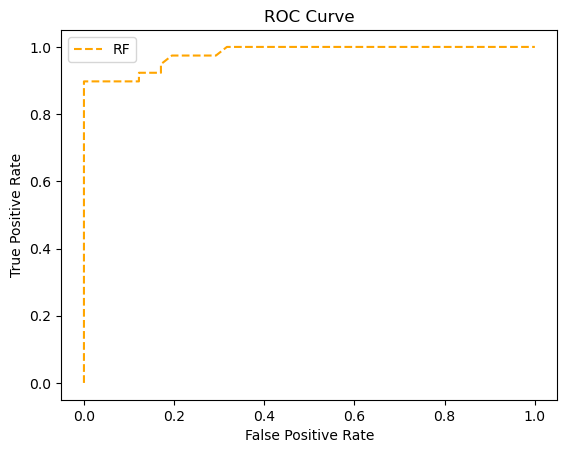

In [25]:
from sklearn.metrics import roc_curve

pred_prob = rf_classifier.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test, pred_prob[:,1],pos_label=1)

plt.plot(fpr,tpr,linestyle='--', color='orange',label='RF')

#title
plt.title('ROC Curve')
#x label
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Support Vector Machine (SVM) Classifier & It's ROC Curve

In [26]:
from sklearn import svm
svm_classifier = svm.SVC() #default kernal is radial basic function (RBF) kernal

desc = svm_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(svm_classifier, X_test, y_test)

SVC()
Accuracy score:
 0.775
Confussion matrix:
 [[32  9]
 [ 9 30]]
Classification report:
               precision    recall  f1-score   support

           0     0.7805    0.7805    0.7805        41
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7750        80
   macro avg     0.7749    0.7749    0.7749        80
weighted avg     0.7750    0.7750    0.7750        80

Precision:
 0.7692307692307693
Recall:
 0.7692307692307693


#### Hyperparameter tuning with SVM classifier

In [27]:
import sklearn.metrics as metrics

for C in[1,10,100,1000,10000,100000,1000000]:
    for kernel in ['rbf', 'linear','poly']:
        svm_classifier = svm.SVC(C=C, kernel=kernel) #similarly.gamma=0.01, 0.5
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'C={C:<10} kernel={kernel:<10} accuracy score={scores: .3%}')

C=1          kernel=rbf        accuracy score= 77.500%
C=1          kernel=linear     accuracy score= 78.750%
C=1          kernel=poly       accuracy score= 81.250%
C=10         kernel=rbf        accuracy score= 81.250%
C=10         kernel=linear     accuracy score= 86.250%
C=10         kernel=poly       accuracy score= 87.500%
C=100        kernel=rbf        accuracy score= 87.500%
C=100        kernel=linear     accuracy score= 87.500%
C=100        kernel=poly       accuracy score= 87.500%
C=1000       kernel=rbf        accuracy score= 88.750%
C=1000       kernel=linear     accuracy score= 87.500%
C=1000       kernel=poly       accuracy score= 88.750%
C=10000      kernel=rbf        accuracy score= 90.000%
C=10000      kernel=linear     accuracy score= 87.500%
C=10000      kernel=poly       accuracy score= 88.750%
C=100000     kernel=rbf        accuracy score= 88.750%
C=100000     kernel=linear     accuracy score= 86.250%
C=100000     kernel=poly       accuracy score= 86.250%
C=1000000 

<Axes: >

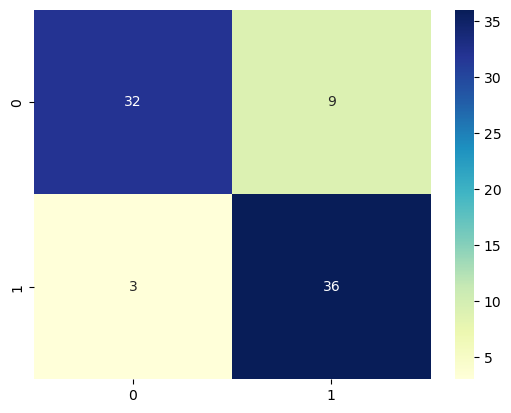

In [28]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True, fmt='d', cmap='YlGnBu')

## K-Nearest Neighbors Classifier & It's ROC Curve

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

desc = knn_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(knn_classifier, X_test, y_test)

KNeighborsClassifier(n_neighbors=4)
Accuracy score:
 0.8375
Confussion matrix:
 [[35  6]
 [ 7 32]]
Classification report:
               precision    recall  f1-score   support

           0     0.8333    0.8537    0.8434        41
           1     0.8421    0.8205    0.8312        39

    accuracy                         0.8375        80
   macro avg     0.8377    0.8371    0.8373        80
weighted avg     0.8376    0.8375    0.8374        80

Precision:
 0.8421052631578947
Recall:
 0.8205128205128205


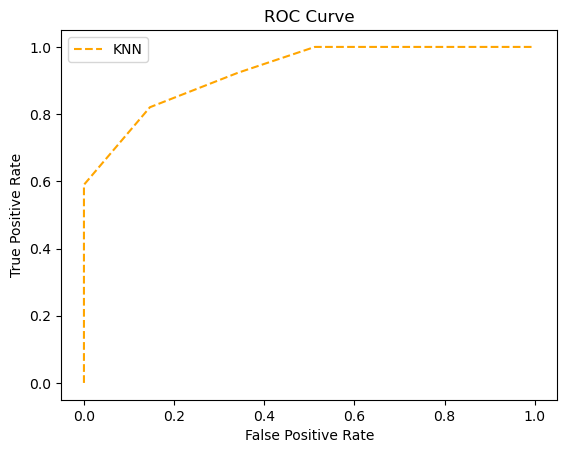

In [37]:
from sklearn.metrics import roc_curve

pred_prob = knn_classifier.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test, pred_prob[:,1],pos_label=1)

plt.plot(fpr,tpr,linestyle='--', color='orange',label='KNN')

#title
plt.title('ROC Curve')
#x label
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


## Decision Tree Classifier & It's ROC Curve

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion= "entropy" ,max_depth=7, random_state=17)
dt_classifier.fit(X_train,y_train)

print(dt_classifier)
print_model_performance(dt_classifier, X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
Accuracy score:
 0.8125
Confussion matrix:
 [[34  7]
 [ 8 31]]
Classification report:
               precision    recall  f1-score   support

           0     0.8095    0.8293    0.8193        41
           1     0.8158    0.7949    0.8052        39

    accuracy                         0.8125        80
   macro avg     0.8127    0.8121    0.8122        80
weighted avg     0.8126    0.8125    0.8124        80

Precision:
 0.8157894736842105
Recall:
 0.7948717948717948


#### Hypermparameter tuning with Dexision Tree

In [39]:
from sklearn.metrics import accuracy_score

for md in range(1, 11, 1):
    for crt in ['gini', 'entropy']:
        dt_classifier = DecisionTreeClassifier(criterion=crt, max_depth=md, random_state=1)  
        dt_classifier.fit(X_train, y_train)
        y_pred = dt_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores:.3%}')

k=1    criterion=gini       accuracy score=76.250%
k=1    criterion=entropy    accuracy score=76.250%
k=2    criterion=gini       accuracy score=82.500%
k=2    criterion=entropy    accuracy score=82.500%
k=3    criterion=gini       accuracy score=83.750%
k=3    criterion=entropy    accuracy score=82.500%
k=4    criterion=gini       accuracy score=85.000%
k=4    criterion=entropy    accuracy score=87.500%
k=5    criterion=gini       accuracy score=86.250%
k=5    criterion=entropy    accuracy score=86.250%
k=6    criterion=gini       accuracy score=85.000%
k=6    criterion=entropy    accuracy score=86.250%
k=7    criterion=gini       accuracy score=85.000%
k=7    criterion=entropy    accuracy score=81.250%
k=8    criterion=gini       accuracy score=80.000%
k=8    criterion=entropy    accuracy score=83.750%
k=9    criterion=gini       accuracy score=81.250%
k=9    criterion=entropy    accuracy score=82.500%
k=10   criterion=gini       accuracy score=80.000%
k=10   criterion=entropy    acc

### Visualization of the Decistion Tree

In [40]:
from sklearn.tree import export_text

r=export_text(dt_classifier,feature_names=list(X.columns))
print(r)

|--- MenopausalStatus_Postmenopausal <= 0.50
|   |--- Weight <= 0.40
|   |   |--- AgeAtMenarche <= 0.38
|   |   |   |--- AgeAtMenarche <= 0.37
|   |   |   |   |--- Parity_Parouse <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Parity_Parouse >  0.50
|   |   |   |   |   |--- Weight <= 0.27
|   |   |   |   |   |   |--- Age <= 0.16
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  0.16
|   |   |   |   |   |   |   |--- Weight <= 0.25
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Weight >  0.25
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Weight >  0.27
|   |   |   |   |   |   |--- Age <= 0.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  0.34
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- AgeAtMenarche >  0.37
|   |   |   |   |--- Weight <= 0.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Weight >  0.19
|   |   |   |   |   |--- class: 

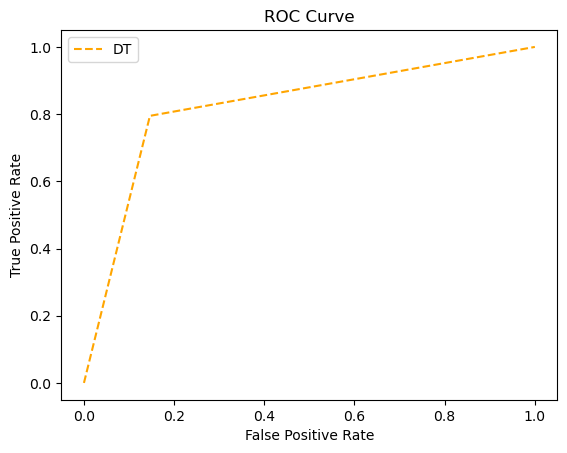

In [41]:
from sklearn.metrics import roc_curve

pred_prob = dt_classifier.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test, pred_prob[:,1],pos_label=1)

plt.plot(fpr,tpr,linestyle='--', color='orange',label='DT')

#title
plt.title('ROC Curve')
#x label
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Neural Network Classifier & It's ROC Curve

In [42]:
from sklearn import neural_network

nn_classifier = neural_network.MLPClassifier(max_iter=5000)
nn_classifier.fit(X_train, y_train)
y_pred = nn_classifier.predict(X_test)
print_model_performance(nn_classifier, X_test, y_test)

Accuracy score:
 0.875
Confussion matrix:
 [[37  4]
 [ 6 33]]
Classification report:
               precision    recall  f1-score   support

           0     0.8605    0.9024    0.8810        41
           1     0.8919    0.8462    0.8684        39

    accuracy                         0.8750        80
   macro avg     0.8762    0.8743    0.8747        80
weighted avg     0.8758    0.8750    0.8748        80

Precision:
 0.8918918918918919
Recall:
 0.8461538461538461


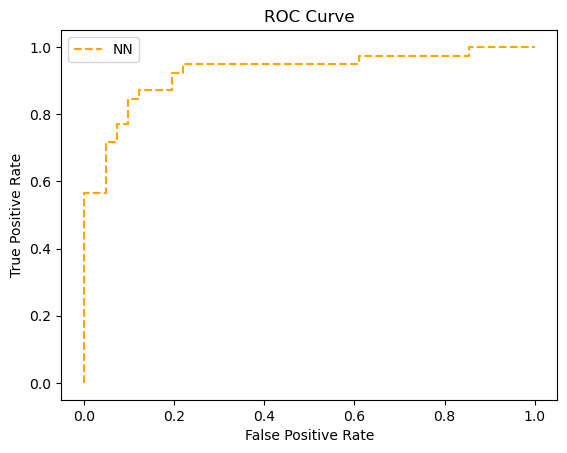

In [43]:
from sklearn.metrics import roc_curve

pred_prob = nn_classifier.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test, pred_prob[:,1],pos_label=1)

plt.plot(fpr,tpr,linestyle='--', color='orange',label='NN')

#title
plt.title('ROC Curve')
#x label
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [145]:
# Save the further cleaned dataset to the same CSV file
data.to_csv('finalresult.csv', index=False) 

## Model Evaluation & Disscution

##### **Classifier Comparison and Conclusion: Logistic Regression vs. K-Nearest Neighbors (KNN)**

##### In this assignment to find the best classifier, The goal was to maximize F1 score, precision, and ROC curve quality. After Analayzing all the scores, These two classifiers by far the most best scores scored among the tested classifiers.

### Logistic Regression:
- F1 Score: Achieved a respectable F1 score of 0.8421, showing a good balance between precision and recall.
- Precision: Demonstrated high precision at 0.8649, minimizing false positives.
- ROC Curve: The ROC curve wasn't as strong, indicating potential limitations in distinguishing between classes.

### K-Nearest Neighbors (KNN):
- F1 Score: Achieved a slightly lower F1 score of 0.8312 but still maintained a good balance.
- Precision: Similar high precision at 0.8421, emphasizing its ability to minimize false positives.
- ROC Curve: Impressed with an almost perfect ROC curve, highlighting its class separation capability.

### Conclusion:
#### For my specific objectives of optimizing F1 score, precision, and ROC curve quality, KNN shines. It outperforms Logistic Regression in ROC curve characteristics and offers competitive F1 score and precision. I recommend KNN as the better classifier for this model.